# 딥러닝-회귀 

### 보스톤 집값 예측 
- 케라스의 dataset 이용

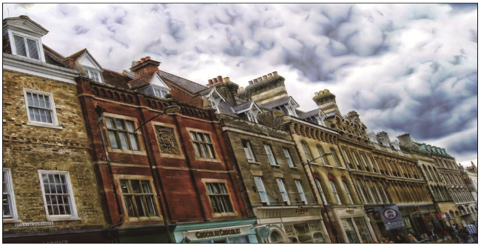

- 1978년, 집값에 가장 큰 영향을 미치는 것이 ‘깨끗한 공기’라는 연구 결과가 
     - 하버드대학교 도시개발학과에서 발표됨
- 이들은 자신의 주장을 뒷받침하기 위해 집값의 변동에 영향을 미치는 여러 가지 요인을 모아서 
     - 환경과 집값의 변동을 보여주는 데이터셋을 만듦
- 이 데이타가 현재 선형 회귀를 테스트하는 가장 유명한 데이터로 쓰이고 있음

### 선형 회귀(Linear Regression) 
- 분류(Classfification) 
     - 참(1) 또는 거짓(0)을 맞히는 문제, 여러 개의 보기 중 맞는 하나를 예측하는 문제
- 선형 회귀(Linear Regression)
     - 하나의 정답을 맞히는 것이 아니라 수치를 예측하는 문제
     - 주어진 환경 요인과 집값의 변동을 학습해서 환경 요인만 놓고 집값을 예측하는 것

### 데이타 불러오기
- 13개의 설명변수, 1개의 레이블(주택가격)

In [ ]:
# 데이타 불러오기
from tensorflow.keras.datasets.boston_housing import load_data



### 학습데이타, 테스트 데이타 확인하기

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

In [ ]:
x_train

In [ ]:
y_train

### 데이타 전처리 - 표준화
- 설명 변수들 간의 스케일(범위) 차이의 문제는 신경망 성능에 큰 영향을 미침
- 각 설명 변수가 가지는 범위가 다를 때는 범위가 동일하도록 조정이 필요 --> 표준화(standardization) 수행
- 표준화 : (관측값 - 평균값)/표준편차 -> 평균을 0으로, 표준편차를 1로 만들어 줌
- 테스트 데이타의 표준화
  - 테스트 데이타의 평균과 표준편차를 구하지 않고 학습 데이타의 평균과 표준편차를 이용하여 전처리 진행


In [ ]:
import numpy as np

# 데이타 표준화
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train = (x_train - mean)/std
x_test = (x_test - mean)/std


In [ ]:
x_test

In [ ]:
x_test

### 검증 데이타 셋 만들기

In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
print("학습 데이타 ", x_train.shape, y_train.shape)
print("검증 데이타 ", x_val.shape, y_val.shape)
print("테스트 데이타 ", x_test.shape, y_test.shape)

### 모델 구성하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy
import tensorflow as tf

# seed 값 설정
seed = 0
tf.random.set_seed(seed)

# 모델 설정
# 입력층 - 13개 노드, 은닉층1 - 64개 노드
# 은닉층2 - 32개 노드
# 출력층 - 1개 노드, 활성화 함수 사용하지 않음(수치 출력)




### 모델 컴파일

### 모델 학습

### 모델 평가하기

In [ ]:
# 예측 가격과 실제 가격의 차이가 평균적으로 2.3달러 정도의 차이가 남


### 모델 평가하기 2

In [ ]:
model.predict(x_test).shape # 2차원

In [ ]:
model.predict(x_test).flatten().shape # 1차원

In [ ]:
# 예측 값과 실제 값의 비교
y_prediction = model.predict(x_test).flatten() # 1차원으로 변경

for i in range(10):
    label = y_test[i]              # 실제 가격
    prediction = y_prediction[i]   # 예상 가격
    print("실제가격: {:.3f}, 예상가격: {:.3f}, 잔차{:.3f}".format(label, prediction, label-prediction))

### 모델을 이용하여 새로운 데이타 예측

In [ ]:
x_test[0]

In [ ]:
new_data = [[6.7240e-02, 0.0000e+00, 3.2400e+00, 0.0000e+00, 4.6000e-01,
       6.3330e+00, 1.7200e+01, 5.2146e+00, 4.0000e+00, 4.3000e+02,
       1.6900e+01, 3.7521e+02, 7.3400e+00]]
model.predict(new_data)